# **VesselBoost Toolbox**
## Module 1 - predict
VesselBoost provides a prediction module, which allows you to use our pre-trained models to segment your data. 

### Pre-trained models
We currently provide 3 pre-trained models (manual, om1, and om2) on Open Science Framework, which you can easily download by running the following cell:

In [10]:
import os
os.makedirs('./../saved_models/', exist_ok=True)
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_0429 ./manual_0429
# !osf -p abk4p fetch /pretrained_models/omelette1_0429 ./omelette1_0429
# !osf -p abk4p fetch /pretrained_models/omelette2_0429 ./omelette2_0429

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 58.6Mbytes/s]


To illustrate the usage of our toolbox, we will download a public MRA dataset next:

In [3]:
# Download the data
!mkdir -p ./../data/img/
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../data/img/GRE_400um.nii

mkdir: cannot create directory ‘./../data/img/’: No such file or directory
100%|████████████████████████████████████| 164M/164M [00:01<00:00, 90.8Mbytes/s]


### Predict without preprocessing 
If you don't want to preprocess your data following our pipeline (N4 bias field correction, denoising), just set the argument *--prep_mode* to 4:

In [11]:
!mkdir -p ./../saved_imgs/generated_label/
!python ./../prediction.py \
        --ds_path ./../data/img/ \
        --out_path ./../saved_imgs/generated_label/ \
        --pretrained ./../saved_models/manual_0429 \
        --prep_mode 4

Prediction session will start shortly..
Aborting the preprocessing procedure!

Running with GPU
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/module_utils.py:237: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

VesselBoost will generate both a *nifti* file of the segmentation (.nii/.nii.gz) and a maximum intensity projection image (.jpg) as shown below:

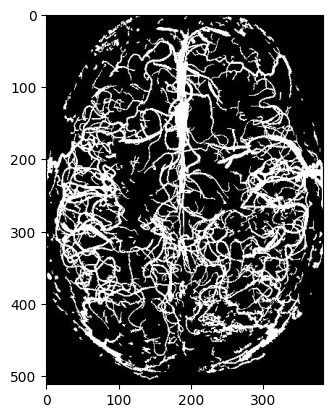

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../saved_imgs/generated_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### Predict with preprocessing

If you require preprocessing, there are three options:
 - Set prep_mode to 1 for N4 bias field correction only;
 - Set prep_mode to 2 for denoising only;
 - Set prep_mode to 3 for both. 
 
In any of those settings, you also have to set a path to store the preprocessed images as in the following:

In [13]:
!mkdir -p ./../data/preprocessed/
!mkdir -p ./../saved_imgs/generated_label_2/
!python ./../prediction.py \
    --ds_path ./../data/img/ \
    --ps_path ./../data/preprocessed/ \
    --out_path ./../saved_imgs/generated_label_2/ \
    --pretrained ./../saved_models/manual_0429 \
    --prep_mode 1

Prediction session will start shortly..
The preprocessing procedure is starting!

100%|█████████████████████████████████████████████| 1/1 [00:49<00:00, 49.70s/it]
All processed images are successfully saved!
Running with GPU
/scratch/user/uqmxu4/Tools/VesselBoost_backup/library/module_utils.py:237: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `we

And here is the MIP image:

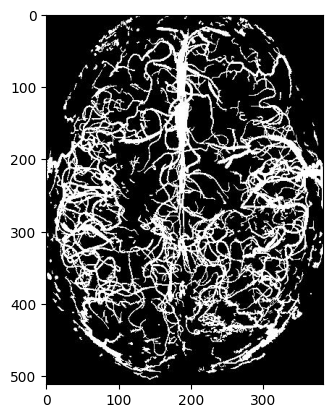

In [14]:
mip_image = img.imread("./../saved_imgs/generated_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')